# Определение перспективного тарифа для телеком компании

## Описание проекта
«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Описание тарифов
##### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

##### Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

Примечание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### План работы

1. Открыть файлы с данными, изучить общую информацию.
2. Произвести предобработку данных: привести их к нужным типам, найти и исправить ошибки.
3. Посчитать для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячную выручку с каждого пользователя.
4. Проанализировать данные: описать поведение клиентов оператора, исходя из выборки. Выяснить, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.
5. Проверить гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Пояснить, как формулировались нулевуая и альтернативная гипотезы; какой критерий использовался для проверки гипотез и почему.
6. Написать общий вывод.

### Шаг 1. Открываем файл с данными и изучаем общую информацию

In [29]:
import pandas as pd #импортируем библиотеки
import matplotlib.pyplot as plt
from math import factorial
import math as mt
from scipy.stats import norm
from scipy import stats as st
import random
import numpy as np
from functools import reduce

In [30]:
#прочитаем файлы, присвоим таблицам имена
calls = pd.read_csv('/datasets/calls.csv') 

internet = pd.read_csv('/datasets/internet.csv') 

messages = pd.read_csv('/datasets/messages.csv') 

tariffs = pd.read_csv('/datasets/tariffs.csv') 

users = pd.read_csv('/datasets/users.csv') 

In [31]:
calls.to_csv('calls')
internet.to_csv('internet')
messages.to_csv('messages')
tariffs.to_csv('tariffs')
users.to_csv('users')

In [32]:
calls.info() #посмотрим общую информацию о таблице calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [33]:
calls.head(10) #выведем первые 10 строк

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Таблица calls содержит столбцы:

* уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Пропущенных значений нет. У большого количества звонков длительность 0 минут. Скорее всего, они появились по причине ошибки в данных. Нужно будет посмотреть, сколько в столбце таких значений и заменить их. Тип данных float в столбце duration лучше не заменять, потому что цифры после запятой будут важны. 

Также в столбце со временем видим странные значения секунд, превышающие 60. Возможно, это следствие ошибки выгрузки, нужно будет привести отображение времени в нормальный вид. 

In [34]:
internet.info() #посмотрим общую информацию о таблице internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [35]:
internet.head(10) #выведем первые 10 строк

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Таблица internet содержит столбцы:

* d — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Пропущенных значений нет. Тип данных float в столбце mb_used лучше не заменять, потому что цифры после запятой будут важны. Значения в Мб нужно заменить на Гб.

In [36]:
messages.info() #посмотрим общую информацию о таблице messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [37]:
messages.head(10) #выведем первые 10 строк

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Таблица messages содержит столбцы:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Пропущенных значений нет.

In [38]:
tariffs.info() #посмотрим общую информацию о таблице tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [39]:
tariffs.head() #выведем первые строки

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs содержит столбцы:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Пропущенных значений нет. Типы данных не требуют замены.

In [40]:
users.info() #посмотрим общую информацию о таблице users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [41]:
users.head(10) #выведем первые 10 строк

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Таблица users содержит столбцы:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

В столбце churn_date всего лишь 38 строк без пропусков. Это означает, что у этих пользователей тариф еще действовал на момент выгрузки данных. Разумеется, мы не удаляем пропуски.
Типы данных не требуют замены.

### Шаг 2. Подготовка данных

In [42]:
calls.loc[calls['duration'] == 0.00] #выводим строки с нулевыми значениями в столбце длительности звонков

calls['duration'].mean() #находим среднее
calls['duration'].median() #и медиану

#посмотрим, какие значения есть в столбце
duration_unique = calls['duration'].unique()
duration_unique

#зададим степень случайности
random.seed(42) 

def calculate_p(N):
    cnt_5_8 = 0
    for i in range(N):
        random_integer = random.randint(1, 26)
        if random_integer >= 5 and random_integer <= 8:
            cnt_5_8 += 1
    return cnt_5_8 / N

p_10000 = calculate_p(10000)
#print('{:.1f}'.format(p_10000))

calls.loc[calls['duration'] == 0.00, 'duration'] = 6.0 #заменяем некорректные значения медианой

#округлим время в большую сторону до минут
np.ceil(calls['duration'])

0          6.0
1          6.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration, Length: 202607, dtype: float64

Выведем строки с нулевыми значениями в столбце длительности звонков. Их очень много: 39613. 
Выясним, насколько вероятно, что нулевые значения в данных о длительности звонков приближаются к среднему. 

Сравним среднее и медиану: они достаточно близки, а значит - значения однородны. 

Посмотрим уникальные знаечния столбца: от 0 до 26.9. Зададим их в качестве отрезка в параметре случайных чисел. Вероятность того, что значение от 5 до 8 - типичны в столбце, составляет 20%.

Значит, нули можно заменить на значение 6, соответствующее среднему, медиане и являющееся типичным для выборки.

Округлим время до минут в большую сторону методом np.ceil.

In [43]:
#переведем мб в гб в таблице с тарифами, сохраним в новый столбец
tariffs['gb_per_month_included'] = tariffs['mg_per_month_included'] / 1024
tariffs['gb_per_month_included']

#то же проделаем для таблицы internet
internet['gb_used'] =internet['mb_used'] / 1024
internet['gb_used']

0         0.110303
1         1.028135
2         1.169199
3         0.537373
4         0.295469
            ...   
149391    0.311426
149392    0.478643
149393    0.000000
149394    1.217109
149395    0.531611
Name: gb_used, Length: 149396, dtype: float64

Поскольку тарифный расчет производится в Гб, то значения Мб нам нужно перевести в Гб. Это касается соответствующих столбцов в таблицах с тарифами и  с трафиком. Делим значения на 1024.

In [44]:
#приводим время к формату в таблице со звонками
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#создаем отдельный столбец с месяцем
calls['month']= calls['call_date'].dt.month

#округляем продолжительность звонков до большего значения
calls['duration'] = np.ceil(calls['duration'])

#группируем звонки по продолжительности за месяц
calls_gr = calls.groupby(['user_id', 'month'])['duration'].sum()

#переиндексируем строки
calls_gr = calls_gr.reset_index(level = 'month')

#объединим таблицы с пользователями и звонками
users_calls = users.merge(calls_gr, on='user_id')

#и с тарифами
users_calls = users_calls.merge(tariffs, left_on='tariff', right_on ='tariff_name')

#вычитаем из потраченных минут включенные в тариф
users_calls['minutes_over_tariff'] = users_calls['duration'] - users_calls['minutes_included']

#умножаем минуты сверх тарифа на цену в тарифе
users_calls['call_add_fee'] = np.ceil(users_calls['minutes_over_tariff'])*users_calls['rub_per_minute']

#заменяем отрицательные значения на нули
users_calls['call_add_fee'] = users_calls['call_add_fee'].apply(lambda x: 0 if x < 0 else x)

Посчитаем помесячную выручку по звонкам с каждого пользователя.
Приведем время к формату. Создадим отельный столец с месяцем. Округлим продолжительность звонков до минут с помощью метода np.ceil.
Сгруппируем звонки по продолжительности за месяц методами groupby, sum.
Переиндексируем строки методом reset_index.
Объединим таблицы: пользователи, звонки, тарифы.
Вычтем из потраченных минут включенные в тариф.
Умножим минуты сверх тарифа на цену в тарифе.
Поскольку многие пользователи тратили меньше бесплатных услуг, чем предусморено в тарифе, получилось много отрицательных значений. Заменим их на нули.

In [45]:
#приводим время к формату в таблице с интернетом
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#создаем отдельный столбец с месяцем
internet['month']= internet['session_date'].dt.month

#округляем продолжительность звонков до большего значения
internet['gb_used'] = np.ceil(internet['gb_used'])

#группируем трафик за месяц
internet_gr = internet.groupby(['user_id', 'month'])['gb_used'].sum()

#переиндексируем строки
internet_gr = internet_gr.reset_index(level = 'month')

#объединим таблицы с пользователями, звонками и трафиком
users_calls_internet = users_calls.merge(internet_gr, on=['user_id','month'])

#вычитаем из потраченных Гб включенные в тариф
users_calls_internet['gb_over_tariff'] = users_calls_internet['gb_used'] - users_calls['gb_per_month_included']

#умножаем Гб сверх тарифа на цену в тарифе
users_calls_internet['internet_add_fee'] = (np.ceil
                                        (users_calls_internet['gb_over_tariff'])*users_calls_internet['gb_per_month_included']
                                           )
#заменяем отрицательные значения на нули
users_calls_internet['internet_add_fee'] = users_calls_internet['internet_add_fee'].apply(lambda x: 0 if x < 0 else x)

Посчитаем помесячную выручку по трафику с каждого пользователя.
Приведем время к формату. Создадим отельный столец с месяцем. Округлим продолжительность звонков до минут с помощью метода np.ceil.
Сгруппируем звонки по продолжительности за месяц методами groupby, sum.
Переиндексируем строки методом reset_index.
Объединим таблицы: пользователи, звонки, трафик, тарифы.
Вычтем из потраченных минут включенные в тариф.
Умножим минуты сверх тарифа на цену в тарифе.
Поскольку многие пользователи тратили меньше бесплатных услуг, чем предусморено в тарифе, получилось много отрицательных значений. Заменим их на нули.

In [46]:
#приводим время к формату в таблице с смс
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#создаем отдельный столбец с месяцем
messages['month'] = messages['message_date'].dt.month

#группируем смс за месяц
messages_gr = messages.groupby(['user_id', 'month'])['id'].count()

#переиндексируем строки
messages_gr = messages_gr.reset_index(level = 'month')

#объединим таблицы с пользователями, звонками, трафиком и смс
users_calls_internet_messages = users_calls_internet.merge(messages_gr, on=['user_id','month'])

#вычитаем из потраченных смс включенные в тариф
users_calls_internet_messages['messages_over_tariff'] = (users_calls_internet_messages['month'] - 
                                                         users_calls_internet_messages['messages_included']
                                                        )
#умножаем смс сверх тарифа на цену в тарифе
users_calls_internet_messages['messages_add_fee'] = (np.ceil(users_calls_internet_messages['messages_over_tariff'])*
                                                     users_calls_internet_messages['messages_included']
                                                    )
#заменяем отрицательные значения на нули
users_calls_internet_messages['messages_add_fee'] = (users_calls_internet_messages['messages_add_fee']
                                                     .apply(lambda x: 0 if x < 0 else x)
                                                    )

Посчитаем помесячную выручку по смс с каждого пользователя.
Приведем время к формату. Создадим отельный столец с месяцем. Округлим продолжительность звонков до минут с помощью метода np.ceil.
Сгруппируем звонки по продолжительности за месяц методами groupby, count (поскольку смс рассчитываются по количеству).
Переиндексируем строки методом reset_index.
Объединим таблицы: пользователи, звонки, тарифы, трафик, смс.
Вычтем из потраченных минут включенные в тариф.
Умножим минуты сверх тарифа на цену в тарифе.
Поскольку многие пользователи тратили меньше бесплатных услуг, чем предусморено в тарифе, получилось много отрицательных значений. Заменим их на нули.

In [47]:
#складываем необходимые столбцы
users_calls_internet_messages['total_user_revenue'] = (users_calls_internet_messages['call_add_fee'] + 
    users_calls_internet_messages['messages_add_fee'] + users_calls_internet_messages['internet_add_fee'] + 
                                                       users_calls_internet_messages['rub_monthly_fee']
                                                      )

#посмотрим среднюю выручку по разным тарифам
users_calls_internet_messages.query('tariff_name == "smart"')['total_user_revenue'].mean()
users_calls_internet_messages.query('tariff_name == "ultra"')['total_user_revenue'].mean()

2325.7579787234044

Сложим получившиеся результаты (доход с трафика, смс и звонков) с абонентской платой по тарифу. Получим помесячную выручку с каждого пользователя.
Посмотрим среднюю выручку по разным тарифам. В тарифе смарт она составляет 1213 р,  а в тарифе ультра - 2325 р.

### Шаг 3. Анализ данных

In [48]:
#сгруппируем таблицу по тарифу смарт, рассчитаем среднее по столбцу duration
minutes_required_smart_per_month = users_calls_internet_messages.query('tariff_name == "smart"')['duration']
print(minutes_required_smart_per_month.mean())

#сгруппируем таблицу по тарифу ультра, рассчитаем среднее по столбцу duration
minutes_required_ultra_per_month = users_calls_internet_messages.query('tariff_name == "ultra"')['duration']
print(minutes_required_ultra_per_month.mean())

490.65065274151436
646.7859042553191


Сколько минут разговора требуется пользователям каждого тарифа в месяц? 
Чтобы выяснить это, сгруппируем с помощью метода query таблицу со звонками и тарифами по тарифам, а затем рассчитаем среднее по столбцу duration.
Пользователям тарифа смарт требуется в среднем 490 минут разговора в месяц, а пользователям тарифа ультра - 646 минут.

In [49]:
#сгруппируем таблицу по тарифу смарт, рассчитаем среднее по столбцу messages
messages_required_smart_per_month = users_calls_internet_messages.query('tariff_name == "smart"')['id']
print(messages_required_smart_per_month.count())

#сгруппируем таблицу по тарифу ультра, рассчитаем среднее по столбцу messages
messages_required_ultra_per_month = users_calls_internet_messages.query('tariff_name == "ultra"')['id']
print(messages_required_ultra_per_month.count())

1915
752


Сколько сообщений требуется пользователям каждого тарифа в месяц? 
Чтобы выяснить это, сгруппируем с помощью метода query таблицу со звонками и тарифами по тарифам, а затем рассчитаем среднее по столбцу messages.
Пользователям тарифа смарт требуется отправить в среднем 1915 сообщений в месяц, а пользователям тарифа ультра - 752 сообщение.

In [50]:
#сгруппируем таблицу по тарифу смарт, рассчитаем среднее по столбцу gb_used
internet_required_smart_per_month = users_calls_internet_messages.query('tariff_name == "smart"')['gb_used']
print(internet_required_smart_per_month.mean())

#сгруппируем таблицу по тарифу ультра, рассчитаем среднее по столбцу gb_used
internet_required_ultra_per_month = users_calls_internet_messages.query('tariff_name == "ultra"')['gb_used']
print(internet_required_ultra_per_month.mean())

42.561879895561354
38.40691489361702


Сколько траффика требуется пользователям каждого тарифа в месяц? 
Чтобы выяснить это, сгруппируем с помощью метода query таблицу со звонками и тарифами по тарифам, а затем рассчитаем среднее по столбцу с траффиком.
Пользователям тарифа смарт требуется тратить в среднем 42.5 Гб в месяц, а пользователям тарифа ультра - 38.4 Гб.

In [51]:
#рассчитаем дисперсию для минут в смарт
variance_smart_minutes = np.var(minutes_required_smart_per_month, ddof = 1)
print(variance_smart_minutes)

#для минут в ультра
variance_ultra_minutes = np.var(minutes_required_ultra_per_month, ddof = 1)
print(variance_ultra_minutes)

#для смс в смарт
variance_smart_messages = np.var(messages_required_smart_per_month, ddof = 1)
print(variance_smart_messages)

#для смс в ультра
variance_ultra_messages = np.var(messages_required_ultra_per_month, ddof = 1)
print(variance_ultra_messages)

#для трафика в смарт
variance_smart_internet = np.var(internet_required_smart_per_month, ddof = 1)
print(variance_smart_internet)

#для трафика в ультра
variance_ultra_internet = np.var(internet_required_ultra_per_month, ddof = 1)
print(variance_ultra_internet)

46564.88990944831
129939.37221116526
718.8036193391555
2008.5500113324078
217.59426187689442
343.466689803666


Рассчитаем дисперсию для звонков, сообщений и трафика в тарифах смарт и ультра методом var().

In [52]:
#рассчитаем стандартное отклонение для минут в смарт
minutes_required_smart_per_month_std = np.sqrt(variance_smart_minutes)
print(minutes_required_smart_per_month_std)

#для минут в ультра
minutes_required_ultra_per_month_std = np.sqrt(variance_ultra_minutes)
print(minutes_required_ultra_per_month_std)

#для смс в смарт
messages_required_smart_per_month_std = np.sqrt(variance_smart_messages)
print(messages_required_smart_per_month_std)

#для смс в ультра
messages_required_ultra_per_month_std = np.sqrt(variance_ultra_messages)
print(messages_required_ultra_per_month_std)

#для трафика в смарт
internet_required_smart_per_month_std = np.sqrt(variance_smart_internet)
print(internet_required_smart_per_month_std)

#для трафика в ультра
internet_required_ultra_per_month_std = np.sqrt(variance_smart_internet)
print(internet_required_ultra_per_month_std)

215.7889939488303
360.4710421256682
26.810513224090947
44.816849636408044
14.751076634500087
14.751076634500087


Рассчитаем стандартное отклонение для звонков, сообщений и трафика в тарифах смарт и ультра методом sqrt().

    month  smart  ultra
0       1    904    521
1       2    273    856
2       3    535    394
3       4    659    172
4       5    929    831
5       6    457    589
6       7    581    167
7       8    388    135
8       9    922    472
9      10    162    718
10     11    687    455
11     12    608    363


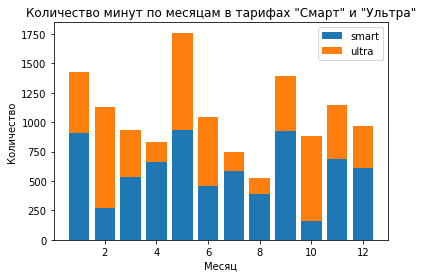

In [53]:
#задаем параметры
x = np.random.randint(100, 1000, size = 12)
y = np.random.randint(100, 1000, size = 12)

#задаем исходный столбец для формирования гистограммы
data = users_calls_internet_messages['duration']

#формируем таблицу, из которой будет строиться гистограмма
minutes_plot = pd.DataFrame(data={'month': np.arange(1, 13), 'smart': x, 'ultra': y})
print(minutes_plot)

#назначаем столбцы для отображения
p1 = plt.bar(minutes_plot['month'], minutes_plot['smart'])
p2 = plt.bar(minutes_plot['month'], minutes_plot['ultra'], bottom = minutes_plot['smart'])

#подписываем оси и общее название гистограммы
plt.ylabel('Количество')
plt.xlabel('Месяц')
plt.title('Количество минут по месяцам в тарифах "Смарт" и "Ультра"')
plt.legend((p1[0], p2[0]), ('smart', 'ultra'))

plt.show()

Построим гистограмму для количества звонков. На ней мы видим, что количество минут в тарифах различается от месяца к месяцу, и лидирует по количеству минут то один тариф, то другой. В целом распределение напоминает гребень, что позволяет предположить, что оно относится к мультимодальному типу. 

    month  smart  ultra
0       1    545    749
1       2    437    104
2       3    980    796
3       4    424    627
4       5    691    407
5       6    281    115
6       7    227    471
7       8    493    248
8       9    145    719
9      10    299    637
10     11    265    483
11     12    662    971


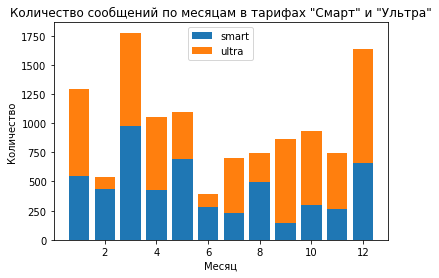

In [54]:
#задаем параметры
x = np.random.randint(100, 1000, size = 12)
y = np.random.randint(100, 1000, size = 12)

#задаем исходный столбец для формирования гистограммы
data = users_calls_internet_messages['id']

#формируем таблицу, из которой будет строиться гистограмма
messages_plot = pd.DataFrame(data={'month': np.arange(1, 13), 'smart': x, 'ultra': y})
print(messages_plot)

#назначаем столбцы для отображения
p1 = plt.bar(messages_plot['month'], messages_plot['smart'])
p2 = plt.bar(messages_plot['month'], messages_plot['ultra'], bottom = messages_plot['smart'])

#подписываем оси и общее название гистограммы
plt.ylabel('Количество')
plt.xlabel('Месяц')
plt.title('Количество сообщений по месяцам в тарифах "Смарт" и "Ультра"')
plt.legend((p1[0], p2[0]), ('smart', 'ultra'))

plt.show()

Построим гистограмму для количества смс. Распределение здесь тоже напоминает мультимодальное (чередуются более высокие и более низкие столбцы). 

    month  smart  ultra
0       1    481    442
1       2    123    494
2       3    645    683
3       4    605    769
4       5    435    474
5       6    743    704
6       7    688    125
7       8    583    607
8       9    197    256
9      10    197    102
10     11    365    426
11     12    509    871


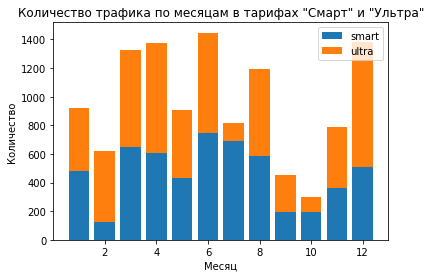

In [55]:
#задаем параметры
x = np.random.randint(100, 1000, size = 12)
y = np.random.randint(100, 1000, size = 12)

#задаем исходный столбец для формирования гистограммы
data = users_calls_internet_messages['gb_used']

#формируем таблицу, из которой будет строиться гистограмма
internet_plot = pd.DataFrame(data={'month': np.arange(1, 13), 'smart': x, 'ultra': y})
print(internet_plot)

#назначаем столбцы для отображения
p1 = plt.bar(internet_plot['month'], internet_plot['smart'])
p2 = plt.bar(internet_plot['month'], internet_plot['ultra'], bottom = internet_plot['smart'])

#подписываем оси и общее название гистограммы
plt.ylabel('Количество')
plt.xlabel('Месяц')
plt.title('Количество трафика по месяцам в тарифах "Смарт" и "Ультра"')
plt.legend((p1[0], p2[0]), ('smart', 'ultra'))

plt.show()

Построим гистограмму для количества трафика. Это распределение напоминает двухпиковое, при это пики в тарифах не совпадают. Для тарифа "Ультра" они приходятся на май и сентябрь, для "Смарт" - на февраль и июль. 

### Шаг 4. Проверка гипотез

In [56]:
#создадим переменные для выручки по тарифам смарт и ультра
smart_revenue = users_calls_internet_messages.query('tariff_name == "smart"')['total_user_revenue']
ultra_revenue = users_calls_internet_messages.query('tariff_name == "ultra"')['total_user_revenue']

#проверим гипотезу
alpha = 0.05
results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue, equal_var = False)

print('p-значение:', results.pvalue)
#задаем условие
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Выясним, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт».

Для этого нужно сформулировать двухстороннюю нулевую гипотезу, характерным признаком которой будет знак равеснства в формулировке, и альтернативную, в формулировке которой будет знак неравенства.

Сформулируем нулевую гипотезу: средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт». 
Альтернативная гипотеза: средняя выручка пользователей тарифа «Ультра» не равна средней выручке пользователей тарифа «Смарт».

Получилась гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для нее подходит метод scipy.stats.ttest_ind (array1, array2, equal_var): он возвращает статистику разности между сравниваемыми значениями и уровень значимости для этой статистики. По результатам его работы мы понимаем, стоит ли отвергать нулевую гипотезу.

Результат - отвергаем нулевую гипотезу. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [57]:
#создадим переменную по выручке абонентов из Москвы
msk_revenue = users_calls_internet_messages.query('city == "Москва"')['total_user_revenue']
#и по пользователям из других регионов
other_regions_revenue = users_calls_internet_messages.query('city != "Москва"')['total_user_revenue']

#проверим гипотезу
alpha = 0.05
results = st.ttest_ind(
    msk_revenue, 
    other_regions_revenue, equal_var = False)

print('p-значение:', results.pvalue)
#задаем условие
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2630632730500166e-07
Отвергаем нулевую гипотезу


Теперь проверим, отличается ли средняя выручка пользователей из Москвы от средней выручки пользователей из других регионов.

Для этого аналогичным образом нужно сформулировать двухстороннюю нулевую гипотезу, характерным признаком которой будет знак равеснства в формулировке, и альтернативную, в формулировке которой будет знак неравенства.

Сформулируем нулевую гипотезу: средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
Альтернативная гипотеза: средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов.

Для нее тоже применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

Результат - отвергаем нулевую гипотезу. Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

### Общий вывод

На основе анализа поведения клиентов можно сделать вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается в пользу тарифа "Ультра": он приносит больший доход, чем тариф "Смарт". 

Средняя выручка с каждого пользователя в тарифе "Смарт" составляет 1213 р,  а в тарифе "Ультра" - 2325 р. 
Пользователям тарифа "Смарт" требуется в среднем 490 минут разговора в месяц, а пользователям тарифа "Ультра" - 646 минут.
Сообщений пользователи тарифа "Смарт" отправляют больше: 1915 по сравнению с 752 для тарифа "Ультра".
Пользователям тарифа "Смарт" требуется тратить в среднем 42.5 Гб в месяц, а пользователям тарифа "Ультра" - 38.4 Гб.

Несмотря на то, что пользователи тарифа "Ультра" меньше пользуются траффиком и смс, и на то, что оплачиваемые услуги сверх лимита имеют более высокий порог и более низкую цену, выручка с пользователей этого тарифа больше - возможно, благодаря гораздо более высокой стоимости абонентской платы.